In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


In [2]:
data= pd.read_csv(r"1804496.csv")

In [3]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200803720,DEC us,2019-12-10 00:00:00,2019.0,1.930228e+09,2019-12-06,20191206,20191206,20191211.0,USD,RV,1.0,NaN,7585.75,20191201.0,NAM2,1.930228e+09,0
1,U001,0200418007,AM,2019-06-27 00:00:00,2019.0,1.929443e+09,2019-06-11,20190606,20190611,20190626.0,USD,RV,1.0,NaN,2453.32,20190611.0,NAA8,1.929443e+09,0
2,CA02,0140104409,LOB trust,2019-03-29 00:00:00,2019.0,2.960535e+09,2019-03-17,20190317,20190317,20190401.0,CAD,RV,1.0,NaN,23172.41,20190322.0,CA10,2.960535e+09,0
3,CA02,140104440,SO systems,2019-06-12 00:00:00,2019.0,2.960550e+09,2019-05-22,20190522,20190522,20190608.0,CAD,RV,1.0,NaN,82499.98,20190529.0,CA10,2.960550e+09,0
4,U001,0200769623,WAL-MAR llc,2019-01-29 00:00:00,2019.0,1.928647e+09,2019-01-18,20190118,20190118,20190202.0,USD,RV,1.0,NaN,9755.74,20190118.0,NAH4,1.928647e+09,0


In [4]:
data.shape

(50000, 19)

In [5]:
data.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,5.000000e+04,5.000000e+04,4.999300e+04,50000.000000
mean,2019.192360,2.012573e+09,2.019239e+07,2.019242e+07,2.019258e+07,1.0,NaN,3.204270e+04,2.019243e+07,2.011525e+09,0.068520
std,0.394158,2.908517e+08,3.813668e+03,3.798294e+03,3.823429e+03,0.0,NaN,4.031474e+04,3.797691e+03,2.770480e+08,0.252639
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018121e+07,1.0,NaN,1.660000e+00,2.018112e+07,1.928502e+09,0.000000
25%,2019.000000,1.929232e+09,2.019042e+07,2.019042e+07,2.019051e+07,1.0,NaN,4.631910e+03,2.019042e+07,1.929232e+09,0.000000
50%,2019.000000,1.929797e+09,2.019080e+07,2.019080e+07,2.019082e+07,1.0,NaN,1.710703e+04,2.019080e+07,1.929797e+09,0.000000
75%,2019.000000,1.930379e+09,2.019112e+07,2.019112e+07,2.019121e+07,1.0,NaN,4.641641e+04,2.019112e+07,1.930379e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,1.673456e+06,2.020052e+07,2.960634e+09,1.000000


In [6]:
data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [7]:
data.nunique()

business_code                 6
cust_number                1447
name_customer              4335
clear_date                  407
buisness_year                 2
doc_id                    50000
posting_date                498
document_create_date        503
document_create_date.1      498
due_in_date                 539
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         45166
baseline_create_date        502
cust_payment_terms           72
invoice_id                49993
isOpen                        2
dtype: int64

In [8]:
data.isnull()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
49996,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
49997,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
49998,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [9]:
data.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 3426
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    7
isOpen                        0
dtype: int64

In [10]:
df=data.sort_values(by ='document_create_date.1')

In [11]:
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [12]:
df.document_create_date=pd.to_numeric(df.document_create_date)
df['document_create_date.1']=pd.to_numeric(df['document_create_date.1'])

In [13]:
df.posting_date=pd.to_datetime(df.posting_date)
df.posting_date=pd.to_numeric(df.posting_date)

In [14]:
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date                int64
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [15]:
mixed ="business_code"
mixed_num=mixed +"_numerical"
mixed_label= mixed+"_label"

In [16]:
df[mixed_num]=df[mixed].str.extract('(\d+)')
df[mixed_label]=df[mixed].str[:2]

In [17]:
mixed ="cust_payment_terms"
mixed_num=mixed +"_numerical"
mixed_label= mixed+"_label"

In [18]:
df[mixed_num]=df[mixed].str.extract('(\d+)')
df[mixed_label]=df[mixed].str[:3]

In [19]:
df.nunique()

business_code                       6
cust_number                      1447
name_customer                    4335
clear_date                        407
buisness_year                       2
doc_id                          50000
posting_date                      498
document_create_date              503
document_create_date.1            498
due_in_date                       539
invoice_currency                    2
document type                       2
posting_id                          1
area_business                       0
total_open_amount               45166
baseline_create_date              502
cust_payment_terms                 72
invoice_id                      49993
isOpen                              2
business_code_numerical             6
business_code_label                 2
cust_payment_terms_numerical       23
cust_payment_terms_label           30
dtype: int64

In [20]:
df.dtypes

business_code                    object
cust_number                      object
name_customer                    object
clear_date                       object
buisness_year                   float64
doc_id                          float64
posting_date                      int64
document_create_date              int64
document_create_date.1            int64
due_in_date                     float64
invoice_currency                 object
document type                    object
posting_id                      float64
area_business                   float64
total_open_amount               float64
baseline_create_date            float64
cust_payment_terms               object
invoice_id                      float64
isOpen                            int64
business_code_numerical          object
business_code_label              object
cust_payment_terms_numerical     object
cust_payment_terms_label         object
dtype: object

In [21]:
df[['total_open_amount','invoice_currency']]

,total_open_amount,invoice_currency
14236,8187.79,USD
12840,36881.43,USD
10088,19377.65,CAD
17565,55838.07,USD
40190,16405.07,USD
...,...,...
46717,56855.41,USD
47347,11355.66,USD
47318,451664.91,USD
48937,2625.00,USD


In [22]:
df2 = df[df['invoice_currency']=='USD']
df2.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,business_code_numerical,business_code_label,cust_payment_terms_numerical,cust_payment_terms_label
14236,U001,0200769623,WAL-MAR corp,2019-01-15 00:00:00,2019.0,1.928538e+09,1546128000000000000,20181229,20181230,20190114.0,...,NaN,8187.79,20181230.0,NAH4,1.928538e+09,0,001,U0,4,NAH
12840,U001,0200769623,WAL-MAR,2019-01-10 00:00:00,2019.0,1.928544e+09,1546128000000000000,20181230,20181230,20190114.0,...,NaN,36881.43,20181230.0,NAH4,1.928544e+09,0,001,U0,4,NAH
17565,U001,0200769623,WAL-MAR co,2019-01-11 00:00:00,2019.0,1.928543e+09,1546128000000000000,20181230,20181230,20190114.0,...,NaN,55838.07,20181230.0,NAH4,1.928543e+09,0,001,U0,4,NAH
40190,U001,0100043892,IN-N co,2019-01-17 00:00:00,2019.0,1.928547e+09,1546128000000000000,20181231,20181230,20190114.0,...,NaN,16405.07,20181230.0,NAA8,1.928547e+09,0,001,U0,8,NAA
3153,U001,0200769623,WAL-MAR us,2019-01-10 00:00:00,2019.0,1.928545e+09,1546128000000000000,20181231,20181230,20190114.0,...,NaN,39125.69,20181230.0,NAH4,1.928545e+09,0,001,U0,4,NAH


In [23]:
df3 = df[df['invoice_currency']=='CAD']
df4=df3.total_open_amount*0.79

In [24]:
df5=df3.replace(to_replace ="CAD", value ="USD")

In [25]:
frames=[df5,df2]
result = pd.concat(frames)

In [26]:
result.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,business_code_numerical,business_code_label,cust_payment_terms_numerical,cust_payment_terms_label
10088,CA02,0140105847,GORDON F foundation,2019-01-17 00:00:00,2019.0,2.960520e+09,1546128000000000000,20181230,20181230,20190110.0,...,NaN,19377.65,20181231.0,CA10,2.960520e+09,0,02,CA,10,CA1
8012,CA02,0140105686,SYSC corp,2019-01-17 00:00:00,2019.0,2.960520e+09,1546128000000000000,20181230,20181230,20190112.0,...,NaN,7471.20,20190102.0,CA10,2.960520e+09,0,02,CA,10,CA1
4648,CA02,0140104429,COSTCO llc,2019-01-14 00:00:00,2019.0,2.960521e+09,1546214400000000000,20181231,20181231,20190113.0,...,NaN,4375.60,20190103.0,CA10,2.960521e+09,0,02,CA,10,CA1
22593,CA02,0140104440,SO in,2019-01-16 00:00:00,2019.0,2.960521e+09,1546214400000000000,20181231,20181231,20190112.0,...,NaN,89597.99,20190102.0,CA10,2.960521e+09,0,02,CA,10,CA1
184,CA02,0140104429,COSTCO in,2019-01-18 00:00:00,2019.0,2.960520e+09,1546214400000000000,20181231,20181231,20190113.0,...,NaN,112211.34,20190103.0,CA10,2.960520e+09,0,02,CA,10,CA1


In [27]:
result[['total_open_amount','invoice_currency']]

,total_open_amount,invoice_currency
10088,19377.65,USD
8012,7471.20,USD
4648,4375.60,USD
22593,89597.99,USD
184,112211.34,USD
...,...,...
46717,56855.41,USD
47347,11355.66,USD
47318,451664.91,USD
48937,2625.00,USD


In [28]:
result[['cust_payment_terms','cust_payment_terms_label','cust_payment_terms_numerical']]

,cust_payment_terms,cust_payment_terms_label,cust_payment_terms_numerical
10088,CA10,CA1,10
8012,CA10,CA1,10
4648,CA10,CA1,10
22593,CA10,CA1,10
184,CA10,CA1,10
...,...,...,...
46717,NAH4,NAH,4
47347,NAH4,NAH,4
47318,NA10,NA1,10
48937,NAA8,NAA,8


In [29]:
result1=result.drop(['invoice_currency','area_business','cust_number','posting_id','name_customer','doc_id','invoice_id','cust_payment_terms','business_code','document_create_date'], axis = 1) 

In [30]:
result1.head()

,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,isOpen,business_code_numerical,business_code_label,cust_payment_terms_numerical,cust_payment_terms_label
10088,2019-01-17 00:00:00,2019.0,1546128000000000000,20181230,20190110.0,RV,19377.65,20181231.0,0,02,CA,10,CA1
8012,2019-01-17 00:00:00,2019.0,1546128000000000000,20181230,20190112.0,RV,7471.20,20190102.0,0,02,CA,10,CA1
4648,2019-01-14 00:00:00,2019.0,1546214400000000000,20181231,20190113.0,RV,4375.60,20190103.0,0,02,CA,10,CA1
22593,2019-01-16 00:00:00,2019.0,1546214400000000000,20181231,20190112.0,RV,89597.99,20190102.0,0,02,CA,10,CA1
184,2019-01-18 00:00:00,2019.0,1546214400000000000,20181231,20190113.0,RV,112211.34,20190103.0,0,02,CA,10,CA1


In [31]:
result1.dtypes

clear_date                       object
buisness_year                   float64
posting_date                      int64
document_create_date.1            int64
due_in_date                     float64
document type                    object
total_open_amount               float64
baseline_create_date            float64
isOpen                            int64
business_code_numerical          object
business_code_label              object
cust_payment_terms_numerical     object
cust_payment_terms_label         object
dtype: object

In [32]:
result1.duplicated().sum()

192

In [33]:
result1.drop_duplicates(keep=False,inplace=True)

In [34]:
result1.duplicated().sum()

0

In [35]:
result1['document type'].unique()

array(['RV', 'X2'], dtype=object)

In [36]:
result1['X2'] = np.where(result1['document type'] == 'X2',1,0)
result1['RV'] = np.where(result1['document type'] == 'RV',1,0)

In [37]:
business= result1.groupby(result1['X2'])['X2'].count()
business

X2
0    49620
1        7
Name: X2, dtype: int64

In [38]:
business= result1.groupby(result1['RV'])['RV'].count()
business

RV
0        7
1    49620
Name: RV, dtype: int64

In [39]:
result1['business_code_numerical'].unique()

array(['02', '013', '001', '005', '002', '007'], dtype=object)

In [40]:
result1['business_code_numerical'].describe()

count     49627
unique        6
top         001
freq      44934
Name: business_code_numerical, dtype: object

In [41]:
result1.head()

,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,isOpen,business_code_numerical,business_code_label,cust_payment_terms_numerical,cust_payment_terms_label,X2,RV
10088,2019-01-17 00:00:00,2019.0,1546128000000000000,20181230,20190110.0,RV,19377.65,20181231.0,0,02,CA,10,CA1,0,1
8012,2019-01-17 00:00:00,2019.0,1546128000000000000,20181230,20190112.0,RV,7471.20,20190102.0,0,02,CA,10,CA1,0,1
4648,2019-01-14 00:00:00,2019.0,1546214400000000000,20181231,20190113.0,RV,4375.60,20190103.0,0,02,CA,10,CA1,0,1
22593,2019-01-16 00:00:00,2019.0,1546214400000000000,20181231,20190112.0,RV,89597.99,20190102.0,0,02,CA,10,CA1,0,1
184,2019-01-18 00:00:00,2019.0,1546214400000000000,20181231,20190113.0,RV,112211.34,20190103.0,0,02,CA,10,CA1,0,1


In [42]:
result1['cust_payment_terms_label'].unique()

array(['CA1', 'NAX', 'NAA', 'NAG', 'CA3', 'CAB', 'CAX', 'NAV', 'NAH',
       'NAU', 'NAC', 'NAW', 'NA9', 'NAD', 'NA3', 'NA1', 'NAM', 'NAB',
       'C10', 'BR1', 'NA8', 'NAN', 'B03', 'NA2', 'NAT', 'B05', 'BR5',
       'B11', 'BR6', '90M'], dtype=object)

In [43]:
import category_encoders as ce
encoder= ce.OrdinalEncoder(cols=['cust_payment_terms_label'],return_df=True,
                           mapping=[{'col':'cust_payment_terms_label',
'mapping':{'CA1':0, 'NAX':1, 'NAA':2, 'NAG':3, 'CA3':4, 'CAB':5, 'CAX':6, 'NAV':7, 'NAH':8,
       'NAU':9, 'NAC':10, 'NAW':11, 'NA9':12, 'NAD':13, 'NA3':14, 'NA1':15, 'NAM':16, 'NAB':17,
       'C10':18, 'BR1':19, 'NA8':20,'NAN':21,'B03':22,'NA2':23, 'NAT':24, 'B05':25, 'BR5':26,
       'B11':27, 'BR6':28, '90M':29}}])
DF = encoder.fit_transform(result1)

C:\Users\sshre\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [44]:
DF['due_in_date']= DF['due_in_date'].astype('object')
DF['due_in_date']= pd.to_datetime(DF['due_in_date'],format='%Y%m%d')

In [45]:
DF

,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,isOpen,business_code_numerical,business_code_label,cust_payment_terms_numerical,cust_payment_terms_label,X2,RV
10088,2019-01-17 00:00:00,2019.0,1546128000000000000,20181230,2019-01-10,RV,19377.65,20181231.0,0,02,CA,10,0,0,1
8012,2019-01-17 00:00:00,2019.0,1546128000000000000,20181230,2019-01-12,RV,7471.20,20190102.0,0,02,CA,10,0,0,1
4648,2019-01-14 00:00:00,2019.0,1546214400000000000,20181231,2019-01-13,RV,4375.60,20190103.0,0,02,CA,10,0,0,1
22593,2019-01-16 00:00:00,2019.0,1546214400000000000,20181231,2019-01-12,RV,89597.99,20190102.0,0,02,CA,10,0,0,1
184,2019-01-18 00:00:00,2019.0,1546214400000000000,20181231,2019-01-13,RV,112211.34,20190103.0,0,02,CA,10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46717,NaN,2020.0,1589241600000000000,20200512,2020-05-27,RV,56855.41,20200512.0,1,001,U0,4,8,0,1
47347,NaN,2020.0,1589241600000000000,20200512,2020-05-27,RV,11355.66,20200512.0,1,001,U0,4,8,0,1
47318,NaN,2020.0,1589241600000000000,20200512,2020-05-22,RV,451664.91,20200512.0,1,001,U0,10,15,0,1
48937,NaN,2020.0,1589500800000000000,20200515,2020-05-30,RV,2625.00,20200515.0,1,001,U0,8,2,0,1


In [46]:
DF.dtypes

clear_date                              object
buisness_year                          float64
posting_date                             int64
document_create_date.1                   int64
due_in_date                     datetime64[ns]
document type                           object
total_open_amount                      float64
baseline_create_date                   float64
isOpen                                   int64
business_code_numerical                 object
business_code_label                     object
cust_payment_terms_numerical            object
cust_payment_terms_label                 int32
X2                                       int32
RV                                       int32
dtype: object

In [47]:
DF['business_code_label'].unique()

array(['CA', 'U0'], dtype=object)

In [48]:
encoder= ce.OrdinalEncoder(cols=['business_code_label'],return_df=True,
                           mapping=[{'col':'business_code_label',
'mapping':{'CA':0,'U0':1}}])
DF1 = encoder.fit_transform(DF)

C:\Users\sshre\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [49]:
DF1.dtypes

clear_date                              object
buisness_year                          float64
posting_date                             int64
document_create_date.1                   int64
due_in_date                     datetime64[ns]
document type                           object
total_open_amount                      float64
baseline_create_date                   float64
isOpen                                   int64
business_code_numerical                 object
business_code_label                      int32
cust_payment_terms_numerical            object
cust_payment_terms_label                 int32
X2                                       int32
RV                                       int32
dtype: object

In [50]:
DF1['business_code_numerical'].unique()

array(['02', '013', '001', '005', '002', '007'], dtype=object)

In [51]:
DF1.business_code_numerical= DF1.business_code_numerical.astype('float64') 

In [52]:
DF1.cust_payment_terms_numerical= DF1.cust_payment_terms_numerical.astype('float64')

In [53]:
DF1.dtypes

clear_date                              object
buisness_year                          float64
posting_date                             int64
document_create_date.1                   int64
due_in_date                     datetime64[ns]
document type                           object
total_open_amount                      float64
baseline_create_date                   float64
isOpen                                   int64
business_code_numerical                float64
business_code_label                      int32
cust_payment_terms_numerical           float64
cust_payment_terms_label                 int32
X2                                       int32
RV                                       int32
dtype: object

In [54]:
DF1.head()

,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,isOpen,business_code_numerical,business_code_label,cust_payment_terms_numerical,cust_payment_terms_label,X2,RV
10088,2019-01-17 00:00:00,2019.0,1546128000000000000,20181230,2019-01-10,RV,19377.65,20181231.0,0,2.0,0,10.0,0,0,1
8012,2019-01-17 00:00:00,2019.0,1546128000000000000,20181230,2019-01-12,RV,7471.20,20190102.0,0,2.0,0,10.0,0,0,1
4648,2019-01-14 00:00:00,2019.0,1546214400000000000,20181231,2019-01-13,RV,4375.60,20190103.0,0,2.0,0,10.0,0,0,1
22593,2019-01-16 00:00:00,2019.0,1546214400000000000,20181231,2019-01-12,RV,89597.99,20190102.0,0,2.0,0,10.0,0,0,1
184,2019-01-18 00:00:00,2019.0,1546214400000000000,20181231,2019-01-13,RV,112211.34,20190103.0,0,2.0,0,10.0,0,0,1


In [55]:
DF1.head()

,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,isOpen,business_code_numerical,business_code_label,cust_payment_terms_numerical,cust_payment_terms_label,X2,RV
10088,2019-01-17 00:00:00,2019.0,1546128000000000000,20181230,2019-01-10,RV,19377.65,20181231.0,0,2.0,0,10.0,0,0,1
8012,2019-01-17 00:00:00,2019.0,1546128000000000000,20181230,2019-01-12,RV,7471.20,20190102.0,0,2.0,0,10.0,0,0,1
4648,2019-01-14 00:00:00,2019.0,1546214400000000000,20181231,2019-01-13,RV,4375.60,20190103.0,0,2.0,0,10.0,0,0,1
22593,2019-01-16 00:00:00,2019.0,1546214400000000000,20181231,2019-01-12,RV,89597.99,20190102.0,0,2.0,0,10.0,0,0,1
184,2019-01-18 00:00:00,2019.0,1546214400000000000,20181231,2019-01-13,RV,112211.34,20190103.0,0,2.0,0,10.0,0,0,1


In [56]:
DF1.dtypes

clear_date                              object
buisness_year                          float64
posting_date                             int64
document_create_date.1                   int64
due_in_date                     datetime64[ns]
document type                           object
total_open_amount                      float64
baseline_create_date                   float64
isOpen                                   int64
business_code_numerical                float64
business_code_label                      int32
cust_payment_terms_numerical           float64
cust_payment_terms_label                 int32
X2                                       int32
RV                                       int32
dtype: object

In [57]:
DF1.head()

,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,isOpen,business_code_numerical,business_code_label,cust_payment_terms_numerical,cust_payment_terms_label,X2,RV
10088,2019-01-17 00:00:00,2019.0,1546128000000000000,20181230,2019-01-10,RV,19377.65,20181231.0,0,2.0,0,10.0,0,0,1
8012,2019-01-17 00:00:00,2019.0,1546128000000000000,20181230,2019-01-12,RV,7471.20,20190102.0,0,2.0,0,10.0,0,0,1
4648,2019-01-14 00:00:00,2019.0,1546214400000000000,20181231,2019-01-13,RV,4375.60,20190103.0,0,2.0,0,10.0,0,0,1
22593,2019-01-16 00:00:00,2019.0,1546214400000000000,20181231,2019-01-12,RV,89597.99,20190102.0,0,2.0,0,10.0,0,0,1
184,2019-01-18 00:00:00,2019.0,1546214400000000000,20181231,2019-01-13,RV,112211.34,20190103.0,0,2.0,0,10.0,0,0,1


In [58]:
X_test = DF1[DF1['clear_date'].isnull()] 


X_train=DF1.dropna(subset=['clear_date'])

In [59]:
X_train.shape

(46219, 15)

In [60]:
X_test.shape

(3408, 15)

In [61]:
X_train['clear_date'] = pd.to_datetime(X_train['clear_date'])

C:\Users\sshre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
X_train.dtypes

clear_date                      datetime64[ns]
buisness_year                          float64
posting_date                             int64
document_create_date.1                   int64
due_in_date                     datetime64[ns]
document type                           object
total_open_amount                      float64
baseline_create_date                   float64
isOpen                                   int64
business_code_numerical                float64
business_code_label                      int32
cust_payment_terms_numerical           float64
cust_payment_terms_label                 int32
X2                                       int32
RV                                       int32
dtype: object

In [63]:
X_train['due_in_date'] = pd.to_datetime(X_train['due_in_date'])

C:\Users\sshre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
X_train['delay']=(X_train['clear_date']-X_train['due_in_date'])

C:\Users\sshre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
X_train.head()

,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,isOpen,business_code_numerical,business_code_label,cust_payment_terms_numerical,cust_payment_terms_label,X2,RV,delay
10088,2019-01-17,2019.0,1546128000000000000,20181230,2019-01-10,RV,19377.65,20181231.0,0,2.0,0,10.0,0,0,1,7 days
8012,2019-01-17,2019.0,1546128000000000000,20181230,2019-01-12,RV,7471.20,20190102.0,0,2.0,0,10.0,0,0,1,5 days
4648,2019-01-14,2019.0,1546214400000000000,20181231,2019-01-13,RV,4375.60,20190103.0,0,2.0,0,10.0,0,0,1,1 days
22593,2019-01-16,2019.0,1546214400000000000,20181231,2019-01-12,RV,89597.99,20190102.0,0,2.0,0,10.0,0,0,1,4 days
184,2019-01-18,2019.0,1546214400000000000,20181231,2019-01-13,RV,112211.34,20190103.0,0,2.0,0,10.0,0,0,1,5 days


In [66]:
X_train.dtypes

clear_date                       datetime64[ns]
buisness_year                           float64
posting_date                              int64
document_create_date.1                    int64
due_in_date                      datetime64[ns]
document type                            object
total_open_amount                       float64
baseline_create_date                    float64
isOpen                                    int64
business_code_numerical                 float64
business_code_label                       int32
cust_payment_terms_numerical            float64
cust_payment_terms_label                  int32
X2                                        int32
RV                                        int32
delay                           timedelta64[ns]
dtype: object

In [67]:
X_train['due_in_date'] = pd.to_numeric(X_train['due_in_date'])

C:\Users\sshre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
X_train['clear_date'] = pd.to_numeric(X_train['clear_date'])

C:\Users\sshre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
X_train.dtypes

clear_date                                int64
buisness_year                           float64
posting_date                              int64
document_create_date.1                    int64
due_in_date                               int64
document type                            object
total_open_amount                       float64
baseline_create_date                    float64
isOpen                                    int64
business_code_numerical                 float64
business_code_label                       int32
cust_payment_terms_numerical            float64
cust_payment_terms_label                  int32
X2                                        int32
RV                                        int32
delay                           timedelta64[ns]
dtype: object

In [70]:
X_test.dtypes

clear_date                              object
buisness_year                          float64
posting_date                             int64
document_create_date.1                   int64
due_in_date                     datetime64[ns]
document type                           object
total_open_amount                      float64
baseline_create_date                   float64
isOpen                                   int64
business_code_numerical                float64
business_code_label                      int32
cust_payment_terms_numerical           float64
cust_payment_terms_label                 int32
X2                                       int32
RV                                       int32
dtype: object

In [71]:
X_test['delay'] = np.nan

C:\Users\sshre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
X_test.dtypes

clear_date                              object
buisness_year                          float64
posting_date                             int64
document_create_date.1                   int64
due_in_date                     datetime64[ns]
document type                           object
total_open_amount                      float64
baseline_create_date                   float64
isOpen                                   int64
business_code_numerical                float64
business_code_label                      int32
cust_payment_terms_numerical           float64
cust_payment_terms_label                 int32
X2                                       int32
RV                                       int32
delay                                  float64
dtype: object

In [73]:
X_test.drop(['clear_date'],axis=1,inplace = True)

C:\Users\sshre\Anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [74]:
X_train.drop(['clear_date'],axis=1,inplace = True)

In [75]:
X_test.dtypes

buisness_year                          float64
posting_date                             int64
document_create_date.1                   int64
due_in_date                     datetime64[ns]
document type                           object
total_open_amount                      float64
baseline_create_date                   float64
isOpen                                   int64
business_code_numerical                float64
business_code_label                      int32
cust_payment_terms_numerical           float64
cust_payment_terms_label                 int32
X2                                       int32
RV                                       int32
delay                                  float64
dtype: object

In [76]:
X_train.dtypes

buisness_year                           float64
posting_date                              int64
document_create_date.1                    int64
due_in_date                               int64
document type                            object
total_open_amount                       float64
baseline_create_date                    float64
isOpen                                    int64
business_code_numerical                 float64
business_code_label                       int32
cust_payment_terms_numerical            float64
cust_payment_terms_label                  int32
X2                                        int32
RV                                        int32
delay                           timedelta64[ns]
dtype: object

In [77]:
X_train.delay= X_train.delay.astype('string')

C:\Users\sshre\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [78]:
X_train['delay'] = X_train['delay'].apply(lambda x : x.split(" ")[0])

C:\Users\sshre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
X_train.dtypes

buisness_year                   float64
posting_date                      int64
document_create_date.1            int64
due_in_date                       int64
document type                    object
total_open_amount               float64
baseline_create_date            float64
isOpen                            int64
business_code_numerical         float64
business_code_label               int32
cust_payment_terms_numerical    float64
cust_payment_terms_label          int32
X2                                int32
RV                                int32
delay                            object
dtype: object

In [80]:
X_train.head()

,buisness_year,posting_date,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,isOpen,business_code_numerical,business_code_label,cust_payment_terms_numerical,cust_payment_terms_label,X2,RV,delay
10088,2019.0,1546128000000000000,20181230,1547078400000000000,RV,19377.65,20181231.0,0,2.0,0,10.0,0,0,1,7
8012,2019.0,1546128000000000000,20181230,1547251200000000000,RV,7471.20,20190102.0,0,2.0,0,10.0,0,0,1,5
4648,2019.0,1546214400000000000,20181231,1547337600000000000,RV,4375.60,20190103.0,0,2.0,0,10.0,0,0,1,1
22593,2019.0,1546214400000000000,20181231,1547251200000000000,RV,89597.99,20190102.0,0,2.0,0,10.0,0,0,1,4
184,2019.0,1546214400000000000,20181231,1547337600000000000,RV,112211.34,20190103.0,0,2.0,0,10.0,0,0,1,5


In [81]:
X_train.delay= X_train.delay.astype('float64')

C:\Users\sshre\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [82]:
X_train.dtypes

buisness_year                   float64
posting_date                      int64
document_create_date.1            int64
due_in_date                       int64
document type                    object
total_open_amount               float64
baseline_create_date            float64
isOpen                            int64
business_code_numerical         float64
business_code_label               int32
cust_payment_terms_numerical    float64
cust_payment_terms_label          int32
X2                                int32
RV                                int32
delay                           float64
dtype: object

In [83]:
X_train['document type'].unique()

array(['RV', 'X2'], dtype=object)

In [84]:
X_train['X2'] = np.where(X_train['document type'] == 'X2',1,0)
X_train['RV'] = np.where(X_train['document type'] == 'RV',1,0)

C:\Users\sshre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sshre\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [85]:
business= X_train.groupby(X_train['X2'])['X2'].count()
business

X2
0    46212
1        7
Name: X2, dtype: int64

In [86]:
X_train.drop('document type', axis=1, inplace=True)
X_train.head()

C:\Users\sshre\Anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,buisness_year,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,isOpen,business_code_numerical,business_code_label,cust_payment_terms_numerical,cust_payment_terms_label,X2,RV,delay
10088,2019.0,1546128000000000000,20181230,1547078400000000000,19377.65,20181231.0,0,2.0,0,10.0,0,0,1,7.0
8012,2019.0,1546128000000000000,20181230,1547251200000000000,7471.20,20190102.0,0,2.0,0,10.0,0,0,1,5.0
4648,2019.0,1546214400000000000,20181231,1547337600000000000,4375.60,20190103.0,0,2.0,0,10.0,0,0,1,1.0
22593,2019.0,1546214400000000000,20181231,1547251200000000000,89597.99,20190102.0,0,2.0,0,10.0,0,0,1,4.0
184,2019.0,1546214400000000000,20181231,1547337600000000000,112211.34,20190103.0,0,2.0,0,10.0,0,0,1,5.0


In [87]:
X_train.dtypes

buisness_year                   float64
posting_date                      int64
document_create_date.1            int64
due_in_date                       int64
total_open_amount               float64
baseline_create_date            float64
isOpen                            int64
business_code_numerical         float64
business_code_label               int32
cust_payment_terms_numerical    float64
cust_payment_terms_label          int32
X2                                int32
RV                                int32
delay                           float64
dtype: object

In [88]:
corrmat=X_train.corr()

In [89]:
n=5
top5_cols=corrmat.nlargest(n,'delay')['delay'].index

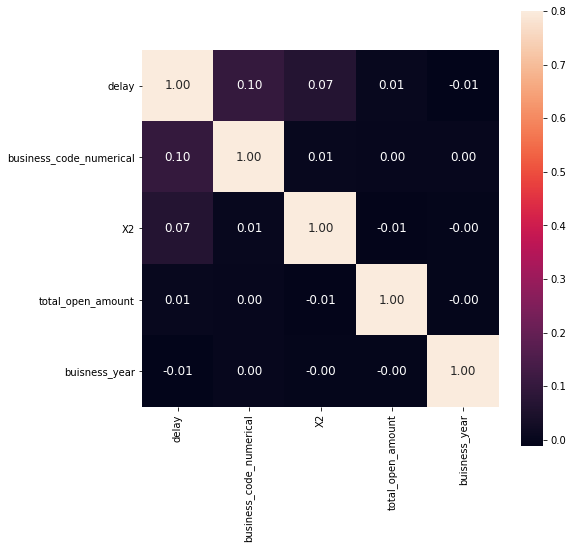

In [90]:
corrmat_top5=X_train[top5_cols].corr()
fig1,ax1=plt.subplots(figsize=(8,8))
sns.heatmap(corrmat_top5,vmax=.8, square=True,ax=ax1,annot=True, fmt='.2f', annot_kws={'size': 12})

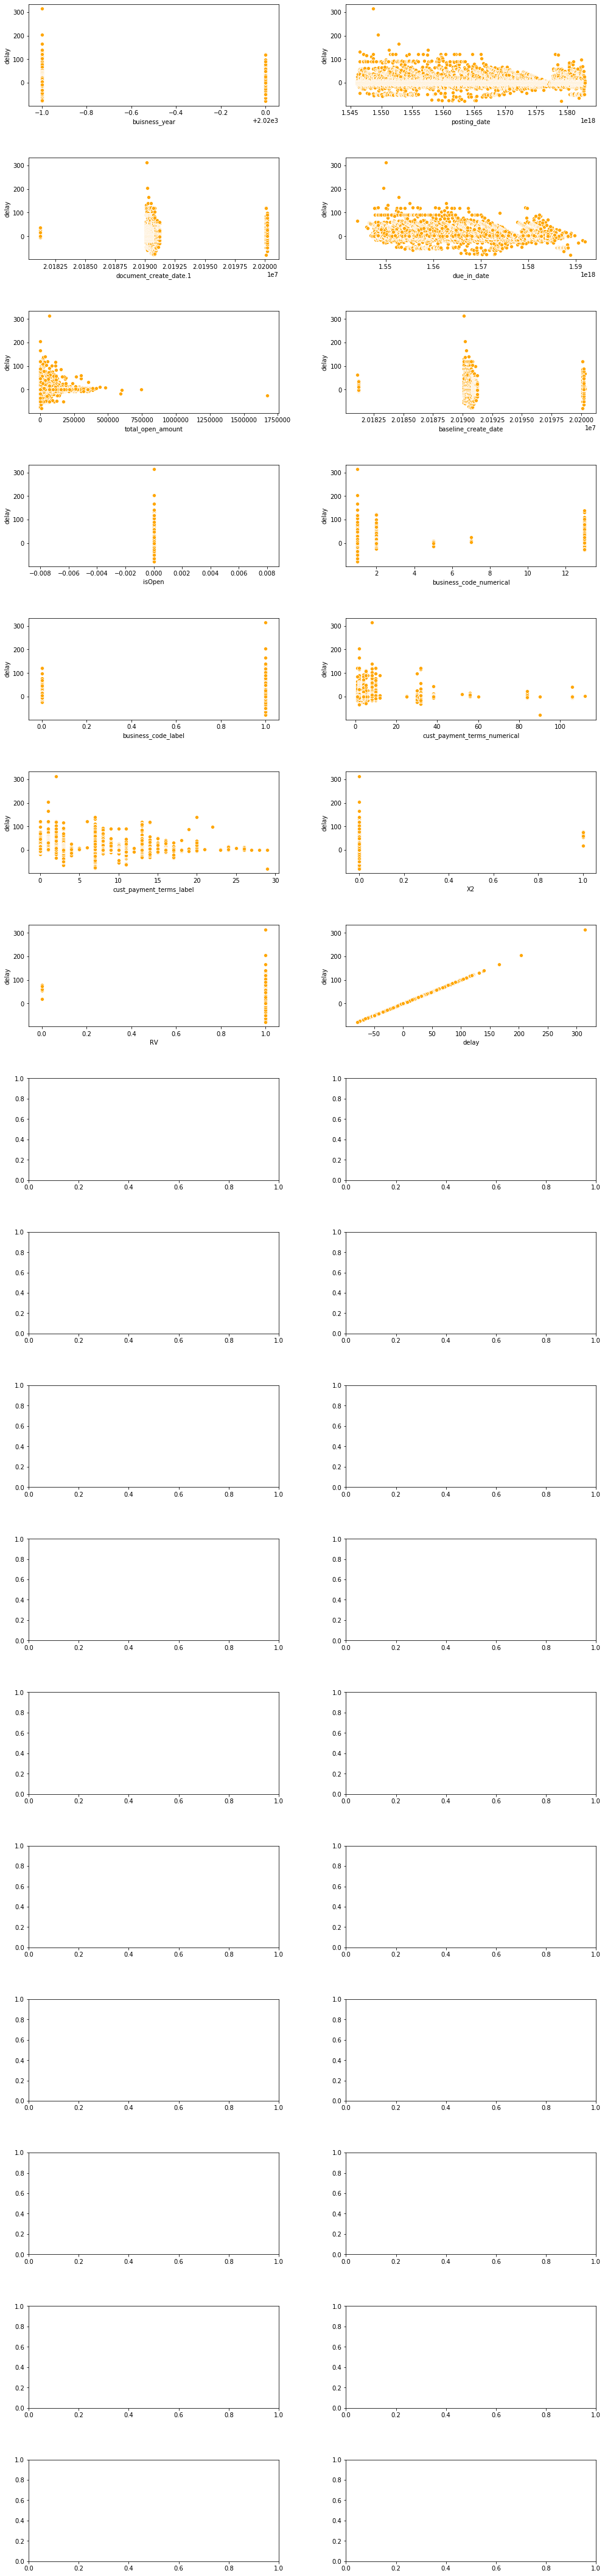

In [91]:
fig,ax=plt.subplots(17,2,figsize=(15,60))
def graph(x,y,r,c,title):
    sns.scatterplot(X_train[x],y,color=('orange'),ax=ax[r][c])
    ax[r][c].set_xlabel(x)
    fig.tight_layout(pad=5.0)

for r,col in enumerate(X_train.columns):
    c=r%2
    graph(col,X_train['delay'],r//2,c,col)

In [92]:
X_train.isnull().sum()

buisness_year                      0
posting_date                       0
document_create_date.1             0
due_in_date                        0
total_open_amount                  0
baseline_create_date               0
isOpen                             0
business_code_numerical            0
business_code_label                0
cust_payment_terms_numerical    3255
cust_payment_terms_label           0
X2                                 0
RV                                 0
delay                              0
dtype: int64

In [93]:
X_train['cust_payment_terms_numerical'].mean()

6.8491062284703474

In [94]:
X_train['cust_payment_terms_numerical'].fillna((X_train['cust_payment_terms_numerical'].mean()), inplace=True)

C:\Users\sshre\Anaconda3\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [95]:
X_test['cust_payment_terms_numerical'].fillna((X_train['cust_payment_terms_numerical'].mean()), inplace=True)

In [96]:
quantile1, quantile3=np.percentile(X_train.delay,[25,75])

In [97]:
print(quantile1,quantile3)

-3.0 2.0


In [98]:
iqr_value=quantile3-quantile1
print(iqr_value)

5.0


In [99]:
low_bound_val=quantile1-(1.5*iqr_value)
up_bound_val=quantile3+(1.5*iqr_value)

In [100]:
print(low_bound_val,up_bound_val)

-10.5 9.5


In [101]:
X_train[(X_train.delay < low_bound_val) | (X_train.delay > up_bound_val)]

,buisness_year,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,isOpen,business_code_numerical,business_code_label,cust_payment_terms_numerical,cust_payment_terms_label,X2,RV,delay
30160,2019.0,1546387200000000000,20190102,1547251200000000000,60002.71,20190102.0,0,2.0,0,10.000000,0,0,1,13.0
13098,2019.0,1546387200000000000,20190102,1547251200000000000,79525.76,20190102.0,0,2.0,0,10.000000,0,0,1,13.0
16743,2019.0,1546473600000000000,20190103,1547510400000000000,286704.84,20190105.0,0,2.0,0,10.000000,0,0,1,10.0
23638,2019.0,1546473600000000000,20190103,1547856000000000000,893.25,20190109.0,0,2.0,0,10.000000,0,0,1,60.0
6606,2019.0,1546732800000000000,20190106,1547596800000000000,4270.19,20190106.0,0,2.0,0,10.000000,0,0,1,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5756,2020.0,1582588800000000000,20200225,1585353600000000000,7246.50,20200225.0,0,1.0,1,32.000000,14,0,1,-11.0
31221,2020.0,1582675200000000000,20200226,1587859200000000000,67562.40,20200226.0,0,1.0,1,6.849106,7,0,1,16.0
19105,2020.0,1582675200000000000,20200226,1586563200000000000,20261.00,20200226.0,0,13.0,1,6.849106,7,0,1,26.0
34773,2020.0,1582675200000000000,20200226,1588291200000000000,1297.04,20200226.0,0,1.0,1,6.849106,3,0,1,-50.0


In [102]:
X_train.drop(X_train[ (X_train.delay > up_bound_val) | (X_train.delay < low_bound_val) ].index , inplace=True)

C:\Users\sshre\Anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [103]:
X_train.skew()

buisness_year                   2.172773
posting_date                    0.087874
document_create_date.1          2.020137
due_in_date                     0.084644
total_open_amount               2.591586
baseline_create_date            2.029781
isOpen                          0.000000
business_code_numerical         9.736427
business_code_label            -3.228420
cust_payment_terms_numerical    8.962572
cust_payment_terms_label        0.854375
X2                              0.000000
RV                              0.000000
delay                          -0.081227
dtype: float64

In [104]:
X_train.drop(['X2','RV'],axis=1,inplace=True)

In [105]:
X_test.drop(['X2','RV'],axis=1,inplace=True)

In [106]:
linear_features=['delay', 'posting_date', 'due_in_date', 'baseline_create_date','document_create_date.1']

In [107]:
# l1=linear_features.drop(['delay'],axis=1)

In [108]:
# Y1d=linear_features.delay

In [109]:
# fig,ax=plt.subplots(1,2,figsize=(20,5))
# sns.distplot(X_train,ax=ax[0],color='green')
# sns.distplot(np.log1p(X_train),ax=ax[1],color='green')

In [110]:
MSE_Score = []
Algorithm = []

In [111]:
Algorithm.append('Linear Regression')

In [112]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

In [113]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [114]:
X1_train=X_train.drop(['delay'],axis=1)

In [115]:
y_train=X_train.delay

In [116]:
y_train.dtypes

dtype('float64')

In [117]:
X1_test=X_test.drop(['delay'],axis=1)

In [118]:
Y1_test=X_test.delay

In [119]:
X1_train.shape

(42731, 11)

In [120]:
X1_train.head(3)

,buisness_year,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,isOpen,business_code_numerical,business_code_label,cust_payment_terms_numerical,cust_payment_terms_label
10088,2019.0,1546128000000000000,20181230,1547078400000000000,19377.65,20181231.0,0,2.0,0,10.0,0
8012,2019.0,1546128000000000000,20181230,1547251200000000000,7471.20,20190102.0,0,2.0,0,10.0,0
4648,2019.0,1546214400000000000,20181231,1547337600000000000,4375.60,20190103.0,0,2.0,0,10.0,0


In [121]:
y_train.shape

(42731,)

In [122]:
y_train.head(3)

10088    7.0
8012     5.0
4648     1.0
Name: delay, dtype: float64

In [123]:
X1_test.shape

(3408, 12)

In [124]:
X1_test.head(3)

,buisness_year,posting_date,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,isOpen,business_code_numerical,business_code_label,cust_payment_terms_numerical,cust_payment_terms_label
48529,2020.0,1582761600000000000,20200227,1583798400000000000,0.0,3345.79,20200229.0,1,2.0,0,10.0,0
47913,2020.0,1582761600000000000,20200227,1583712000000000000,0.0,155511.56,20200228.0,1,2.0,0,10.0,0
48227,2020.0,1582761600000000000,20200227,1583712000000000000,0.0,2736.63,20200228.0,1,2.0,0,10.0,0


In [125]:
Y1_test.shape

(3408,)

In [126]:
Y1_test.head(3)

48529    0.0
47913    0.0
48227    0.0
Name: delay, dtype: float64

In [127]:
X1_test=X1_test.drop(["document type"],axis=1)

In [128]:
X1_test.shape

(3408, 11)

In [129]:
X1_train.dtypes

buisness_year                   float64
posting_date                      int64
document_create_date.1            int64
due_in_date                       int64
total_open_amount               float64
baseline_create_date            float64
isOpen                            int64
business_code_numerical         float64
business_code_label               int32
cust_payment_terms_numerical    float64
cust_payment_terms_label          int32
dtype: object

In [130]:
X1_test.dtypes

buisness_year                   float64
posting_date                      int64
document_create_date.1            int64
due_in_date                       int64
total_open_amount               float64
baseline_create_date            float64
isOpen                            int64
business_code_numerical         float64
business_code_label               int32
cust_payment_terms_numerical    float64
cust_payment_terms_label          int32
dtype: object

In [131]:
y_train.dtypes

dtype('float64')

In [132]:
from sklearn.metrics import mean_squared_error

In [133]:
from sklearn.metrics import r2_score
ridge_mod=Ridge(alpha=0.1)
ridge_mod.fit(X1_train,y_train)
y_pred_test=ridge_mod.predict(X1_test)

print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y1_test, y_pred_test))))  

Root Mean Square Error test = 1.4265594170935956


C:\Users\sshre\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.10768e-38): result may not be accurate.
  overwrite_a=True).T


In [143]:
from sklearn.linear_model import Lasso

Lasso_reg =Lasso()
Lasso_reg =Lasso(alpha=0.0005)
Lasso_reg.fit(X1_train,y_train)
# y_pred_train=Lasso_reg.predict(X_train)
y_pred_test=Lasso_reg.predict(X1_test)

# print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(Y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y1_test, y_pred_test)))) 


Root Mean Square Error test = 1.4267523591394806


C:\Users\sshre\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187600.7500390319, tolerance: 46.36695188036782
  positive)


In [145]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor().fit(X1_train,y_train)
y_predtest=reg.predict(X1_test)
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y1_test, y_predtest)))) 


Root Mean Square Error test = 3.0894317779785787


In [172]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X1_train,y_train)
y_predtest=lr.predict(X1_test)
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y1_test, y_predtest)))) 

Root Mean Square Error test = 1.3927942865682168


In [161]:
prediction=lr.predict(X1_test)


In [162]:
results_df= pd.DataFrame({ 'Outcome': prediction})
results_df.head(10)

,Outcome
0,1.319572
1,1.701351
2,1.310520
3,1.364683
4,1.555964
5,1.654317
6,1.389762
7,1.585586
8,1.444334
9,1.393617


In [163]:
results_df['Defaulter'] = np.where(results_df['Outcome'] <0, "Yes", "No")
#df.head()
    
results_df.head()

,Outcome,Defaulter
0,1.319572,No
1,1.701351,No
2,1.310520,No
3,1.364683,No
4,1.555964,No


In [164]:
results_df.tail(110)

,Outcome,Defaulter
3298,0.528826,No
3299,-1.672479,Yes
3300,-1.391348,Yes
3301,0.537122,No
3302,-3.858401,Yes
...,...,...
3403,-1.364312,Yes
3404,-1.480711,Yes
3405,-1.452066,Yes
3406,0.528401,No


In [165]:
results_df.dtypes


Outcome      float64
Defaulter     object
dtype: object

In [166]:
results_df.head(45)

,Outcome,Defaulter
0,1.319572,No
1,1.701351,No
2,1.310520,No
3,1.364683,No
4,1.555964,No
5,1.654317,No
6,1.389762,No
7,1.585586,No
8,1.444334,No
9,1.393617,No


In [167]:
#results_df.Outcome= results_df.Outcome.astype('int') 

In [168]:
results_df.head(10)

,Outcome,Defaulter
0,1.319572,No
1,1.701351,No
2,1.310520,No
3,1.364683,No
4,1.555964,No
5,1.654317,No
6,1.389762,No
7,1.585586,No
8,1.444334,No
9,1.393617,No


In [169]:
results_df.tail(25)

,Outcome,Defaulter
3383,-1.424983,Yes
3384,-1.398394,Yes
3385,-1.504783,Yes
3386,-1.494487,Yes
3387,-1.447699,Yes
3388,-1.494734,Yes
3389,-1.485772,Yes
3390,-1.488195,Yes
3391,-1.490613,Yes
3392,0.594948,No
